# Анализ удовлетворенности клиентов Клиентикс

**Описание проекта**

Клиентикс  -  программа управления медицинской клиникой. Здоровье эффективно решает задачи регистратуры, лечащего персонала, руководства клиники с помощью простых и эффективных инструментов. 

**Цель проекта:**

Анализ удовлетворенности клиентов сервиса


**Задачи**

- Сформулировать принцип расчета показателя «индекс удовлетворенности клиента Клиентикс». 
- ⁠Собрать данные для расчета индекса. ⁠
- Построить график - как менялся этот индекс за последние несколько лет.

**Структура проекта:**

- [Принцип расчета индекса удовлетворенности клиента ;](#preview)
- [Сбор данных;](#preprocessing)
- [Построение графика;](#analysis)
- [Общий вывод](#theend)

Импорт необходимых библиотек

In [1]:
pip install yandex-reviews-parser

In [28]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt


<a id='preview'></a>
### Принцип расчета индекса удовлетворенности клиента 

Индекс удовлетворенности клиента Клиентикс CRM (назовем его CSI)  можно рассчитать с использованием следующей формулы:

$$ CSI = (\frac{\text{Количество положительных отзывов} + \text{Количество нейтральных отзывов}}{\text{Общее количество отзывов}} ) * 100 $$ 



В качестве положительных отзывов будем рассматривать отзывы с оценками 4 и 5 звезд. Нейтральные отзывы - 3 звезды.


<a id='preprocessing'></a>
### Сбор данных

Данные для расчета CSI возьмем из ЯндексКарт. Воспользуемся скриптом для парсинга отзывов с ЯндексКарт из открытого репозитория https://github.com/useless-apple/yandex_reviews-parser

In [3]:
from yandex_reviews_parser.utils import YandexParser
id_ya = 147086326591 #ID Компании Yandex
parser = YandexParser(id_ya)

all_data = parser.parse() #Получаем все данные

could not detect version_main.therefore, we are assuming it is chrome 108 or higher


In [4]:
reviews = parser.parse(type_parse='reviews') #Получаем список отзывов

could not detect version_main.therefore, we are assuming it is chrome 108 or higher


In [5]:
stars_values = []
date = []

for rev in reviews['company_reviews']:
    stars_values.append(rev['stars'])
    dt = datetime.datetime.fromtimestamp(rev['date']).date().strftime('%d %B %Y')
    date.append(dt)

Получим таблицу с датой, когда был оставлен отзыв и оценкой. 

In [6]:
stars_values = pd.Series(stars_values)
date = pd.Series(date)
df = pd.DataFrame([date,stars_values]).T
df.columns = ['date','stars']
df['date'] = pd.to_datetime(df['date'])
df['stars'] = pd.Series(map(lambda x: int(x),stars_values))
df

,date,stars
0,2024-05-28,5
1,2023-12-29,5
2,2024-02-12,5
3,2024-04-09,5
4,2024-03-04,5
5,2024-02-09,5
6,2024-01-17,5
7,2024-04-15,5
8,2024-02-21,5
9,2024-05-14,5


In [7]:
#Вспомогательные столбцы для подсчета положительных и нейтральных отзывов
df['Положительный отзыв'] = pd.Series(map(lambda x: 1 if x >= 4 else 0,df.set_index('date')['stars']))
df['Нейтральный отзыв'] = pd.Series(map(lambda x: 1 if x == 3 else 0,df.set_index('date')['stars']))


Всего найдено 47 отзывов. 

Рассчитаем CSI

In [8]:
for_csi = df.pivot_table(index =  df['date'].dt.year,values = 'stars',aggfunc = 'count')
for_csi.columns = ['Всего отзывов']
for_csi['Количество положительных отзывов'] = df.pivot_table(index =  df['date'].dt.year,values = 'Положительный отзыв',aggfunc = 'sum')
for_csi['Количество нейтральных отзывов'] = df.pivot_table(index =  df['date'].dt.year,values = 'Нейтральный отзыв',aggfunc = 'sum')
for_csi['CSI'] = round(((for_csi['Количество положительных отзывов']+for_csi['Количество нейтральных отзывов'])*100) / for_csi['Всего отзывов'],2)
for_csi = for_csi.reset_index()
for_csi

,date,Всего отзывов,Количество положительных отзывов,Количество нейтральных отзывов,CSI
0,2018,1,1,0,100.00
1,2019,3,0,0,0.00
2,2020,5,4,0,80.00
3,2021,4,3,0,75.00
4,2022,9,7,0,77.78
5,2023,15,14,0,93.33
6,2024,10,10,0,100.00


<a id='analysis'></a>
### Построение графика

График ниже показывает изменения CSI за последние семь лет.

Text(0.5, 0, 'Год')

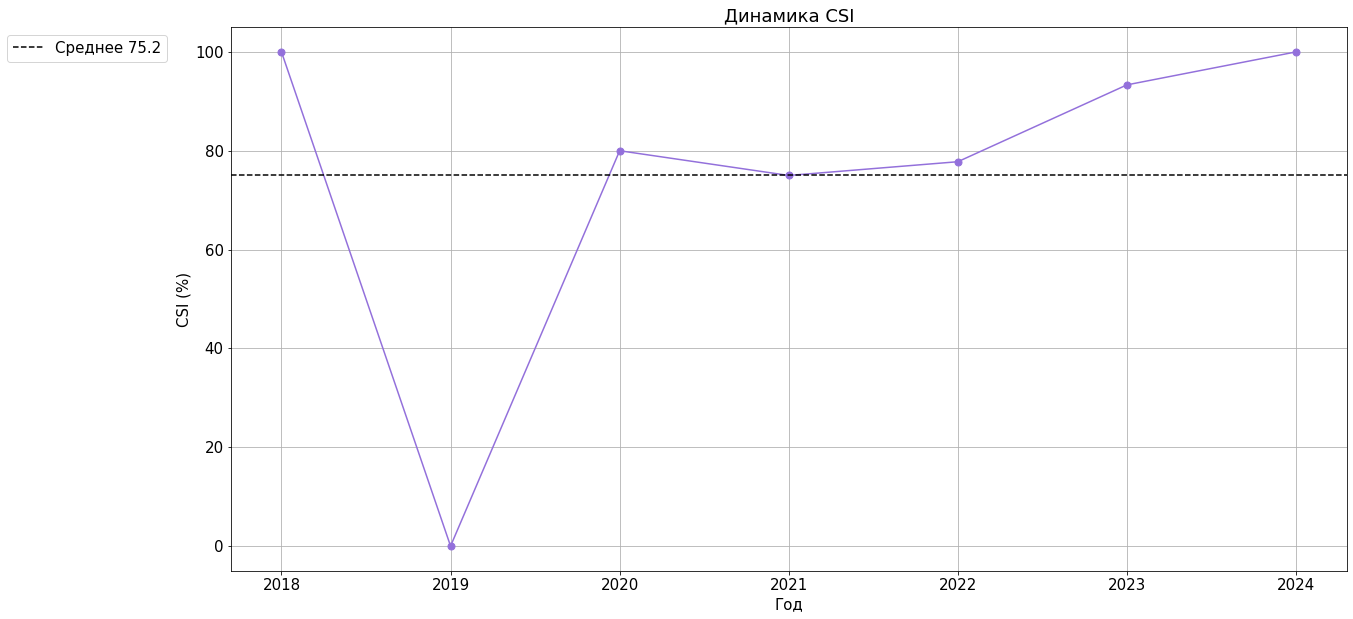

In [9]:
fig = plt.figure(figsize=(20, 10))
plt.rc('font', size=15)

avg =for_csi.pivot_table(index = 'date',values = 'CSI',aggfunc = 'mean')
plt.plot(avg.index, avg['CSI'], marker='o', markersize=7, color='mediumpurple')
mean = round(avg['CSI'].mean(),1)
plt.axhline(y=avg['CSI'].mean(), color='black', linestyle='--',label = f'Среднее {mean}')
plt.legend(bbox_to_anchor=( -0.05 , 1 ))
plt.grid(True)
plt.title('Динамика CSI')
plt.ylabel('CSI (%)')
plt.xlabel('Год')

<a id='theend'></a>
### Общий вывод

* Среднее значение CSI - 75,2%
* Резкое падение в 2019 году: Индекс удовлетворенности клиентов резко упал с 100,0% в 2018 году до 0% в 2019 году. Это значительное снижение указывает на серьезную проблему или событие, которое повлияло на удовлетворенность клиентов в тот период. 
* Постепенное восстановление в 2020-2021 годах: после падения в 2019 году индекс удовлетворенности клиентов постепенно восстанавливался в 2020 году, увеличившись  до 80%
* В 2021 году значение меньше, чем в предыдущем - 75%
* Начиная с 2021 года наблюдается рост индекса удовлетворенности. К 2024 году он составляет 100% 

PS: Стоит учесть, что выборка из 47 отзывов слишком мала, чтобы делать выводы об реальной удовлетворенности клиентов. 